In [1]:
import pandas as pd,numpy as np
import re, os, sys, time, shutil
from sklearn.linear_model import Ridge, ElasticNet, LinearRegression
from sklearn.metrics import log_loss
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

# Project: Evaluate if deep learning can produce better results for regression


Background: The company is trying to invest resources in Deep Learning as a way to upskill data scientists and improve model performance.  However, some are skeptical, and will want justification. 

KBQ1: What machine learning technique best tackles on regression based problem.

KBQ2: Does a machine learning model for regression provide better results?

## KBQ1: What machine learning technique best tackles on regression based problem.

In [2]:
#First load test data
mobilem = pd.read_csv("mobile/train.csv")

In [3]:
mobilem.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Investigate the data


Bad key text.latex.preview in file /Users/aadejare/anaconda3/envs/dev/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/aadejare/anaconda3/envs/dev/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/aadejare/anaconda3/envs/dev/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when

<AxesSubplot:ylabel='Frequency'>

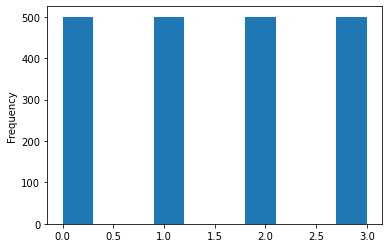

In [4]:
#See distribution of target varibale
mobilem.price_range.plot(kind='hist')

In [5]:
mobilem.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
mobilem.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
mobilem.shape

(2000, 21)

In [7]:
mobilem.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
#These are technically categories
cat_mobile = ['blue','four_g','three_g','touch_screen','wifi','dual_sim', 'price_range'] 

In [10]:
#Describe continuous values.
mobilem.drop(cat_mobile,axis=1).describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [12]:
for i in cat_mobile:
    print(mobilem[i].value_counts())

0    1010
1     990
Name: blue, dtype: int64
1    1043
0     957
Name: four_g, dtype: int64
1    1523
0     477
Name: three_g, dtype: int64
1    1006
0     994
Name: touch_screen, dtype: int64
1    1014
0     986
Name: wifi, dtype: int64
1    1019
0     981
Name: dual_sim, dtype: int64
1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


In [10]:
mobilem.var()

battery_power    1.930884e+05
blue             2.501001e-01
clock_speed      6.658629e-01
dual_sim         2.500348e-01
fc               1.884813e+01
four_g           2.496626e-01
int_memory       3.292670e+02
m_dep            8.318353e-02
mobile_wt        1.253136e+03
n_cores          5.234197e+00
pc               3.677592e+01
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775143e+01
sc_w             1.897820e+01
talk_time        2.985481e+01
three_g          1.817086e-01
touch_screen     2.501161e-01
wifi             2.500760e-01
price_range      1.250625e+00
dtype: float64

We see that we have a train of 2000 items with 21 column and no empty values.
Next is to see if we need to do feature reduction

In [15]:
# First get and see highly correlated values
# Technique from 
# https://stackoverflow.com/questions/17778394/
# list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

c = mobilem.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False).reset_index()

so[so['level_0']!=so['level_1']]

,level_0,level_1,0
21,price_range,ram,0.917046
22,ram,price_range,0.917046
23,fc,pc,0.644595
24,pc,fc,0.644595
25,three_g,four_g,0.584246
...,...,...,...
436,three_g,px_width,0.000350
437,n_cores,sc_h,0.000315
438,sc_h,n_cores,0.000315
439,mobile_wt,px_width,0.000090


WE see that the highest correlated values are Ram to price which makes sense and the next highly correlated value 
is front and primary camera and 3G/4G modem.

We want to predict price but the correlation values are low so we don't have to remove highly correlated values.  Instead let's focus on removing low variance varibale

In [16]:
mobilem2 = mobilem.drop('ram',axis=1).loc[:,mobilem.var()>0.2].copy()

In [17]:
mobilem2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,sc_h,sc_w,talk_time,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,188,2,2,20,756,9,7,19,0,1,1
1,1021,1,0.5,1,0,1,53,136,3,6,905,1988,17,3,7,1,0,2
2,563,1,0.5,1,2,1,41,145,5,6,1263,1716,11,2,9,1,0,2
3,615,1,2.5,0,0,0,10,131,6,9,1216,1786,16,8,11,0,0,2
4,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,8,2,15,1,0,1


In [18]:
mobilem2.shape

(2000, 18)

We now have variables with a varaiance higher that 0.2 which should allow for more robust prediction of our target variable price range

In [19]:
random_state = 3682

X_train, X_test, Y_train, Y_test = train_test_split(mobilem2.drop('price_range', axis=1),\
    mobilem['price_range'], test_size=0.33, random_state=random_state)

In [22]:
# Import evaluation metrics for xecution
from sklearn.metrics import mean_absolute_error, mean_squared_error

Let's first start off with a simple Linear Regression

In [23]:
LinRegres = LinearRegression()
LinRegresModel = LinRegres.fit(X_train, Y_train)

In [25]:
#RSME the smaller theb etter
import math
print(math.sqrt(mean_squared_error(Y_train, LinRegresModel.predict(X_train))))
#Test data
print(math.sqrt(mean_squared_error(Y_test, LinRegresModel.predict(X_test))))

1.0645625220804107
1.0929284429162305


[]

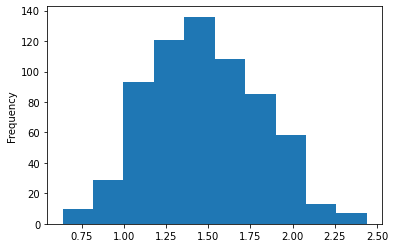

In [26]:
#Plot the X_test predictions for the best ML model
pd.Series(LinRegresModel.predict(X_test), name='pred_price_range').plot(kind='hist').plot(kind='hist')

We know that Linear Regression is good but there are other methods that may meet or beat the RSME give.
Let's build a Grid Search model for prediction

In [27]:

paramaers=[{
    'reg': (LinearRegression(),)
    },{
    'reg': (ElasticNet(),),
    'reg__alpha': (0.5, 1, 2, 5, 10, 50, 100)
    },{
     'reg': (Ridge(),),
    'reg__alpha': (0.5, 1, 2, 5, 10, 50, 100)   
        },
    {
     'reg': (RandomForestRegressor(),), 
    'reg__n_estimators': (100,300,500),
    'reg__random_state': [random_state],
    'reg__criterion': ['squared_error']
    },{
    'reg': (XGBRegressor(),),
    'reg__n_estimators': (100,300,500),
    'reg__learning_rate': (0.1, 0.25),
    'reg__eval_metric': [mean_squared_error],
    'reg__random_state': [random_state]}]

In [28]:
pipe = Pipeline([('reg',LinearRegression())])
# Build the Gridsearch CV pipe
grid_pipe = GridSearchCV(pipe,
    scoring='neg_mean_absolute_error',
    param_grid=paramaers,
    cv=5)

In [29]:
# pefrom the fit
reg_bm = grid_pipe.fit(X_train, Y_train)

In [30]:
reg_bm.best_estimator_

Pipeline(steps=[('reg',
                 RandomForestRegressor(n_estimators=500, random_state=3682))])

We see that extreme gradient boosting for this data is the best, and so now we will use these paramters to see RSME

In [20]:
Y_pred = reg_bm.predict(X_test)

In [21]:
#RSME the smaller theb etter
import math
print(math.sqrt(mean_squared_error(Y_train, reg_bm.predict(X_train))))
#Test data
print(math.sqrt(mean_squared_error(Y_test, Y_pred)))

0.4005504011739309
1.1215036929646436


[]

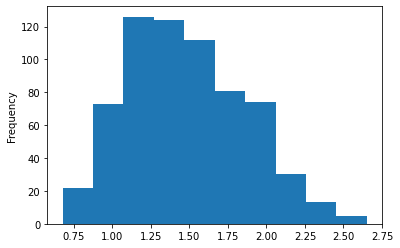

In [22]:
#Plot the X_test predictions for the best ML model
pd.Series(reg_bm.predict(X_test), name='pred_price_range').plot(kind='hist').plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

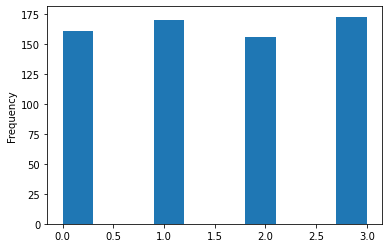

In [23]:
Y_test.plot(kind='hist')

The evaluation is great on these predctions, but to assert if it was good, we should round and recalcualte RSME.

In [24]:
#RSME the smaller the better, this time rounded/
import math
print(math.sqrt(mean_squared_error(Y_train, np.round(reg_bm.predict(X_train),0))))
#Test data
print(math.sqrt(mean_squared_error(Y_test, np.round(Y_pred,0))))

0.48944074085222017
1.1690451944500122


[]

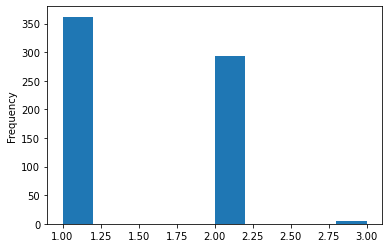

In [25]:
#Plot the X_test predictions for the best ML model
pd.Series(np.round(reg_bm.predict(X_test),0), name='pred_price_range').plot(kind='hist').plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

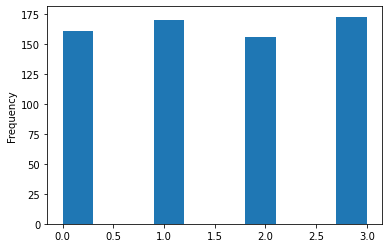

In [26]:
Y_test.plot(kind='hist')

Fairly low RSME on both train and test and the data looks simiarl.  We created a model that can best predict price range on mobile phones

Next is the deep learning model

### KBQ1: What machine learning technique best tackles on regression based problem.

#### Answer: Extreme Gradient Boosting preformed the best out of the models presented.


## KBQ2: Does a deep learning model for regression provide better results?

First build the Deep Learning model 
This method will use LocalGLMNet


In [27]:
import keras as ks
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Input, Conv1D,MaxPooling1D, Flatten
from keras.layers import Dense, Input, GlobalMaxPooling1D, Dot
from keras.layers import Conv1D, MaxPooling1D, Embedding, Conv2D, MaxPool2D, UpSampling2D
from keras.utils import plot_model

Using TensorFlow backend.


In [28]:
#Create the input layer
maxlen = mobilem2.shape[1]-1
design = Input(shape=(maxlen, ))
hidden1 = Dense(maxlen*2, activation='tanh')(design)
hidden2 = Dense(round(maxlen*1.75), activation='tanh')(hidden1)
hidden3 = Dense(round(maxlen*1.5), activation='tanh')(hidden2)
hidden4 = Dense(maxlen, activation='linear', name='Attention')(hidden3)


2023-01-10 21:34:21.397233: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-10 21:34:21.397939: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [29]:
#Create the output layer
final_hidden = Dot(axes=1, normalize=False)([design, hidden4])
output = Dense(1, activation='linear', name='output')(final_hidden)
# 

In [30]:

model = Model(inputs=design, outputs=output)

In [31]:
model.compile(loss='mse', optimizer='nadam')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 17)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 34)           612         input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           1050        dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 26)           806         dense_2[0][0]                    
____________________________________________________________________________________________

In [32]:
history = model.fit(X_train, Y_train,epochs=30, verbose=True, batch_size=5,validation_data=(X_test,Y_test))

Train on 1340 samples, validate on 660 samples
Epoch 1/30
1340/1340 [==============================] - 5s 4ms/step - loss: 10771.7943 - val_loss: 2717.2987
Epoch 2/30
1340/1340 [==============================] - 2s 2ms/step - loss: 2037.9500 - val_loss: 386.8955
Epoch 3/30
1340/1340 [==============================] - 7s 5ms/step - loss: 1083.4527 - val_loss: 367.0076
Epoch 4/30
1340/1340 [==============================] - 10s 7ms/step - loss: 540.6793 - val_loss: 164.3859
Epoch 5/30
1340/1340 [==============================] - 6s 4ms/step - loss: 479.0720 - val_loss: 207.2937
Epoch 6/30
1340/1340 [==============================] - 11s 8ms/step - loss: 131.5172 - val_loss: 76.0476
Epoch 7/30
1340/1340 [==============================] - 4s 3ms/step - loss: 290.5241 - val_loss: 86.6970
Epoch 8/30
1340/1340 [==============================] - 2s 2ms/step - loss: 223.6121 - val_loss: 145.3693
Epoch 9/30
1340/1340 [==============================] - 3s 2ms/step - loss: 54.9496 - val_loss: 31.9

In [33]:
#RSME the smaller theb etter
import math
print(math.sqrt(mean_squared_error(Y_train, model.predict(X_train))))
#Test data
print(math.sqrt(mean_squared_error(Y_test, model.predict(X_test))))

1.2406858226256148
1.3895838402214717


<AxesSubplot:ylabel='Frequency'>

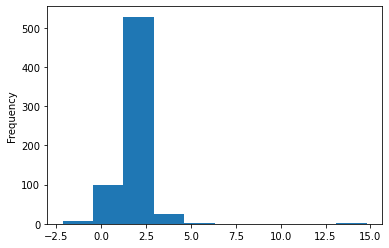

In [34]:
#Plot the X test histogram for LocalGLM
pd.Series(model.predict(X_test)[:,0], name='pred_price_range').plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

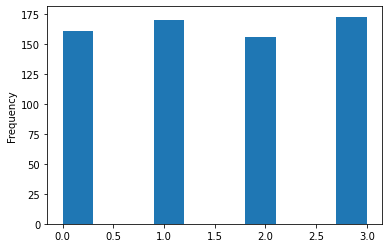

In [35]:
Y_test.plot(kind='hist')

These results don't look all great but we may get better results via rounding.

In [36]:
#RSME the smaller theb etter
import math
print(math.sqrt(mean_squared_error(Y_train, np.round(model.predict(X_train),0))))
#Test data
print(math.sqrt(mean_squared_error(Y_test, np.round(model.predict(X_test),0))))

1.2557331211853062
1.412605587364904


<AxesSubplot:ylabel='Frequency'>

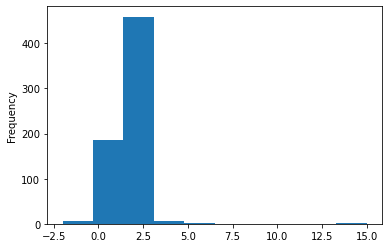

In [46]:
#Plot the X test histogram for LocalGLM
pd.Series(np.round(model.predict(X_test)[:,0],0), name='pred_price_range').plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

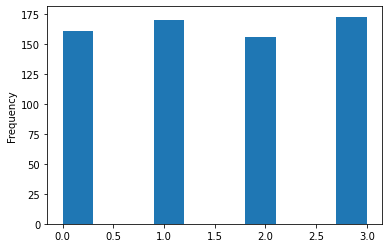

In [38]:
Y_test.plot(kind='hist')

The RSME for the best model Random forest is 
Train: 0.0
Test: 0.3279874350882326

Meanwhile the RSME for the LocalGLM regression is 
Train: 1.0374670941095532
Test: 1.1613381792575317



Based on the results, is the best model is Random Forest, even when accomodating for rounding

Now that we've seen it on train data. Let's do one more evaluation with test data.

In [39]:
mobtest = pd.read_csv("mobile/test.csv")

In [40]:
mobtest.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


Now in this data, there's no price range column, so we're going to predict the price range from our model

In [41]:
mobtest2 = mobtest.loc[:,X_train.columns].copy()

In [42]:
mobtest2_pred = reg_bm.predict(mobtest2)

<AxesSubplot:ylabel='Frequency'>

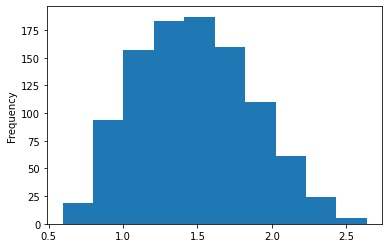

In [43]:
pd.Series(mobtest2_pred, name='pred_price_range').plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

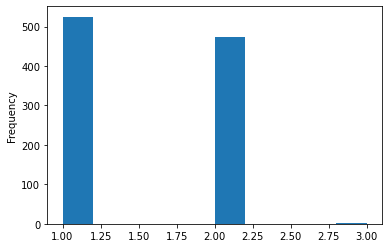

In [44]:
#Now the rounded data version
pd.Series(np.round(mobtest2_pred,0), name='pred_price_range').plot(kind='hist')

## KBQ2: Does a machine learning model for regression provide better results?

Yes, compared to Deep Learning for regression, regular machine learning models can proivde better predicitons.  

# CONCLUSION

We create a model to test what could best predict the price range with a regression model, followed up the model with a rounded estimates evaluation to see if the model could be robust and found that Random Forest provided the best results.  While DEep Learning can do a lot of work, it still has a lot of work to do to improve in regression.  We then took the best model to predict the price ranges for a new unlabled set to prove the potential of the model for foward prediction